<a href="https://colab.research.google.com/github/Martindelosrios/cosmic-kite/blob/main/Examples/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's install cosmic-kite and CAMB


In [1]:
!pip install git+https://github.com/Martindelosrios/cosmic-kite -U

  Cloning https://github.com/Martindelosrios/cosmic-kite to /tmp/pip-req-build-u3cv1kig
  Running command git clone -q https://github.com/Martindelosrios/cosmic-kite /tmp/pip-req-build-u3cv1kig
  Created wheel for cosmic-kite: filename=cosmic_kite-0.1-cp37-none-any.whl size=153481494 sha256=96dd9b12cab90b387fc2229dc9ff0cda8f3ae3e253df84b8ad562605acf1c40a
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ewm0ej8/wheels/7c/cc/53/b4a807cfc36d1c9117a56810be5cce1250bf88c24f7ef69d63
Successfully built cosmic-kite


In [2]:
!pip install camb

     |████████████████████████████████| 1.6MB 4.1MB/s 
  Created wheel for camb: filename=camb-1.3.2-cp37-none-any.whl size=1009266 sha256=ab38899b446b0527e25f2e4f1eb041fedd85091d6232ac22c65fb7a5abfa1f6b
  Stored in directory: /root/.cache/pip/wheels/35/a2/8f/5d3c22c8dc8ab613af9be628f6408f4c2817b7ed85d3feb469
Successfully built camb


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from cosmic_kite import cosmic_kite
import matplotlib.pyplot as plt
import camb
import numpy as np
import h5py
import random
from matplotlib.lines import Line2D

# Let's load the testset and the scalers


In [5]:
from pickle import dump
from pickle import load

scaler_x_TT = load(open(cosmic_kite.data_path + '/scaler_x_TT.pkl', 'rb')) # ps scaler
scaler_y_TT = load(open(cosmic_kite.data_path + '/scaler_y_TT.pkl', 'rb')) # pars scaler

scaler_x_EE = load(open(cosmic_kite.data_path + '/scaler_x_EE.pkl', 'rb')) # ps scaler
scaler_y_EE = load(open(cosmic_kite.data_path + '/scaler_y_EE.pkl', 'rb')) # pars scaler

scaler_x_TE = load(open(cosmic_kite.data_path + '/scaler_x_TE.pkl', 'rb')) # ps scaler
scaler_y_TE = load(open(cosmic_kite.data_path + '/scaler_y_TE.pkl', 'rb')) # pars scaler

testset  = h5py.File(cosmic_kite.data_path + '/testset.hdf5', 'r')   # Testset
x_testset = testset['x_testset'][()] # Power spectra
y_testset = testset['y_testset'][()] # Cosmological parameters
testset.close()

In [6]:
lmax = 2650
lmin = 2

tt_test = x_testset[:,:,0]
ee_test = x_testset[:,:,1]
te_test = x_testset[:,:,2]

# Let's predict the parameters and the power spectra with cosmic_kite

In [7]:
ps_scaled        = scaler_x_TT.transform(tt_test)
pars_pred_scaled = cosmic_kite.encoder_TT.predict(ps_scaled)
pars_pred        = scaler_y_TT.inverse_transform(pars_pred_scaled)

In [8]:
pars_pred = cosmic_kite.tt2pars(tt_test)

In [9]:
#te_pred, ell = cosmic_kite.pars2ps(y_testset) # This function uses the pre-trained decoder
tt_pred, ee_pred, te_pred, ell = cosmic_kite.pars2ps(y_testset) # This function uses the pre-trained decoder
pars_pred    = cosmic_kite.tt2pars(tt_test) # This function uses the pre-trained encoder

WARNING! Some values of tau are outside the training range


# Let's make some plots

## Figure 4 of xxxx.xxxx

In [10]:
omb_chi = np.sqrt(np.mean((y_testset[:,0] - pars_pred[:,0])**2))
omc_chi = np.sqrt(np.mean((y_testset[:,1] - pars_pred[:,1])**2))
H0_chi  = np.sqrt(np.mean((y_testset[:,2] - pars_pred[:,2])**2))
n_chi   = np.sqrt(np.mean((y_testset[:,3] - pars_pred[:,3])**2))
tau_chi = np.sqrt(np.mean((y_testset[:,4] - pars_pred[:,4])**2))
As_chi  = np.sqrt(np.mean((y_testset[:,5] - pars_pred[:,5])**2))

print('We have a sqrt(MSE) of ' + str(omb_chi) + ' predicting $\Omega_{b}h^{2}$')
print('We have a sqrt(MSE) of ' + str(omc_chi) + ' predicting $\Omega_{c}h^{2}$')
print('We have a sqrt(MSE) of ' + str(H0_chi) + ' predicting $H_{0}$')
print('We have a sqrt(MSE) of ' + str(n_chi) + ' predicting $n$')
print('We have a sqrt(MSE) of ' + str(tau_chi) + ' predicting $\\tau$')
print('We have a sqrt(MSE) of ' + str(As_chi) + ' predicting $A_{s}$')

We have a sqrt(MSE) of 1.281837368656392e-05 predicting $\Omega_{b}h^{2}$
We have a sqrt(MSE) of 0.00017124575406319683 predicting $\Omega_{c}h^{2}$
We have a sqrt(MSE) of 0.11800625360083235 predicting $H_{0}$
We have a sqrt(MSE) of 0.00031884479778331503 predicting $n$
We have a sqrt(MSE) of 0.0006228389116491133 predicting $\tau$
We have a sqrt(MSE) of 2.785798924717389e-12 predicting $A_{s}$


In [11]:
omb_prec = 100 * np.mean(np.abs(y_testset[:,0] - pars_pred[:,0])/y_testset[:,0])
omc_prec = 100 * np.mean(np.abs(y_testset[:,1] - pars_pred[:,1])/y_testset[:,1])
H0_prec  = 100 * np.mean(np.abs(y_testset[:,2] - pars_pred[:,2])/y_testset[:,2])
n_prec   = 100 * np.mean(np.abs(y_testset[:,3] - pars_pred[:,3])/y_testset[:,3])
tau_prec = 100 * np.mean(np.abs(y_testset[:,4] - pars_pred[:,4])/y_testset[:,4])
As_prec  = 100 * np.mean(np.abs(y_testset[:,5] - pars_pred[:,5])/y_testset[:,5])

print('We have a precison of ' + str(omb_prec) + ' predicting $\Omega_{b}h^{2}$')
print('We have a precison of ' + str(omc_prec) + ' predicting $\Omega_{c}h^{2}$')
print('We have a precison of ' + str(H0_prec) + ' predicting $H_{0}$')
print('We have a precison of ' + str(n_prec) + ' predicting $n$')
print('We have a precison of ' + str(tau_prec) + ' predicting $\\tau$')
print('We have a precison of ' + str(As_prec) + ' predicting $A_{s}$')

We have a precison of 0.04430724932814515 predicting $\Omega_{b}h^{2}$
We have a precison of 0.10502496342586407 predicting $\Omega_{c}h^{2}$
We have a precison of 0.12257041642433192 predicting $H_{0}$
We have a precison of 0.023208090481757034 predicting $n$
We have a precison of 1.086330846308854 predicting $\tau$
We have a precison of 0.09813871125301879 predicting $A_{s}$


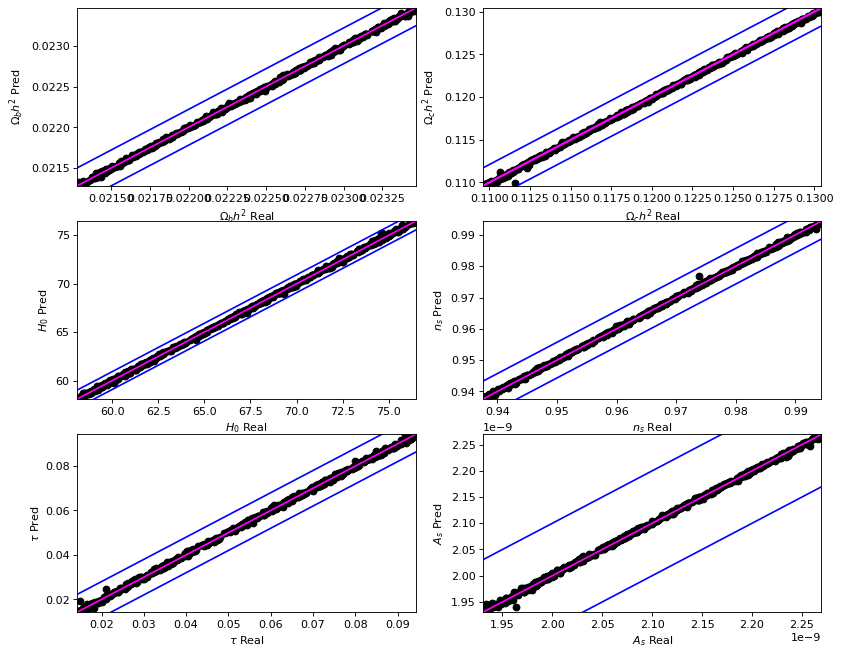

In [12]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,2,1)

ind = np.argmax(np.abs(y_testset[:,0] - pars_pred[:,0]))
plt.scatter(y_testset[:,0],  pars_pred[:,0], color = 'black')
x = np.linspace(np.min(y_testset[:,0]), np.max(y_testset[:,0]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.00022), color = 'blue')
plt.plot(x, (x-0.00022), color = 'blue')
plt.xlim(np.min(y_testset[:,0]), np.max(y_testset[:,0]))
plt.ylim(np.min(y_testset[:,0]), np.max(y_testset[:,0]))
plt.xlabel(r'$\Omega_{b}h^{2}$ Real')
plt.ylabel(r'$\Omega_{b}h^{2}$ Pred')


plt.subplot(3,2,2)

ind = np.argmax(np.abs(y_testset[:,1]- pars_pred[:,1]))
plt.scatter(y_testset[:,1], pars_pred[:,1], color = 'black')
x = np.linspace(np.min(y_testset[:,1]), np.max(y_testset[:,1]), 100)
plt.plot(x, x, color = 'magenta', linewidth = 2)
plt.plot(x, (x+0.0021), color = 'blue')
plt.plot(x, (x-0.0021), color = 'blue')
plt.xlim(np.min(y_testset[:,1]), np.max(y_testset[:,1]))
plt.ylim(np.min(y_testset[:,1]), np.max(y_testset[:,1]))
plt.xlabel(r'$\Omega_{c}h^{2}$ Real')
plt.ylabel(r'$\Omega_{c}h^{2}$ Pred')


plt.subplot(3,2,3)

ind = np.argmax(np.abs(y_testset[:,2]- pars_pred[:,2]))
plt.scatter(y_testset[:,2], pars_pred[:,2], color = 'black')
x = np.linspace(np.min(y_testset[:,2]), np.max(y_testset[:,2]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.92), color = 'blue')
plt.plot(x, (x-0.92), color = 'blue')
plt.xlim(np.min(y_testset[:,2]), np.max(y_testset[:,2]))
plt.ylim(np.min(y_testset[:,2]), np.max(y_testset[:,2]))
plt.xlabel(r'$H_{0}$ Real')
plt.ylabel(r'$H_{0}$ Pred')

plt.subplot(3,2,4)

ind = np.argmax(np.abs(y_testset[:,3]- pars_pred[:,3]))
plt.scatter(y_testset[:,3], pars_pred[:,3], color = 'black')
x = np.linspace(np.min(y_testset[:,3]), np.max(y_testset[:,3]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.0057), color = 'blue')
plt.plot(x, (x-0.0057), color = 'blue')
plt.xlim(np.min(y_testset[:,3]), np.max(y_testset[:,3]))
plt.ylim(np.min(y_testset[:,3]), np.max(y_testset[:,3]))
plt.xlabel(r'$n_{s}$ Real')
plt.ylabel(r'$n_{s}$ Pred')

plt.subplot(3,2,5)

ind = np.argmax(np.abs(y_testset[:,4]- pars_pred[:,4]))
plt.scatter(y_testset[:,4], pars_pred[:,4], color = 'black')
x = np.linspace(np.min(y_testset[:,4]), np.max(y_testset[:,4]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.008), color = 'blue')
plt.plot(x, (x-0.008), color = 'blue')
plt.xlim(np.min(y_testset[:,4]), np.max(y_testset[:,4]))
plt.ylim(np.min(y_testset[:,4]), np.max(y_testset[:,4]))
plt.xlabel(r'$\tau$ Real')
plt.ylabel(r'$\tau$ Pred')

plt.subplot(3,2,6)

ind = np.argmax(np.abs(y_testset[:,5]- pars_pred[:,5]))
plt.scatter(y_testset[:,5], pars_pred[:,5], color = 'black')
x = np.linspace(np.min(y_testset[:,5]), np.max(y_testset[:,5]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+1e-10), color = 'blue')
plt.plot(x, (x-1e-10), color = 'blue')
plt.xlim(np.min(y_testset[:,5]), np.max(y_testset[:,5]))
plt.ylim(np.min(y_testset[:,5]), np.max(y_testset[:,5]))
plt.xlabel(r'$A_{s}$ Real')
plt.ylabel(r'$A_{s}$ Pred')

plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/scatter_results.pdf')

## Figure 5 of xxxx.xxxx

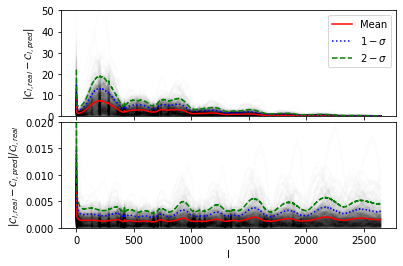

In [13]:
lmax = 2650
lmin = 2

tt_error = np.abs(tt_test - tt_pred)
tt_por   = np.abs((tt_test - tt_pred)/tt_test)

tt_error_mean = np.mean(tt_error, axis = 0)
tt_error_sd   = np.std(tt_error, axis = 0)

tt_por_mean = np.mean(tt_por, axis = 0)
tt_por_sd   = np.std(tt_por, axis = 0)

l = np.arange(2, 2650)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.})

for i in range(len(y_testset) - 1):
  ind = i

  axs[0].plot(l , np.abs(tt_test[ind,:] - tt_pred[ind,:]), color = 'black', alpha = 0.01)
  axs[0].set(ylabel = r'$|\mathcal{C}_{l,real} - \mathcal{C}_{l, pred}|$')

  axs[1].plot(l, np.abs(tt_test[ind,:] - tt_pred[ind,:])/tt_test[ind,:], color = 'black', alpha = 0.01)
  axs[1].set(ylabel = r'$|\mathcal{C}_{l,real} - \mathcal{C}_{l, pred}|/\mathcal{C}_{l,real}$', xlabel = 'l')

axs[0].plot(l, tt_error_mean, color = 'red', label = 'Mean')
axs[1].plot(l, tt_por_mean, color = 'red')

axs[0].plot(l, tt_error_mean + tt_error_sd, color = 'blue', linestyle = ':', label = r'$1-\sigma$')
axs[1].plot(l, tt_por_mean + tt_por_sd, color = 'blue', linestyle = ':')

axs[0].plot(l, tt_error_mean + 2*tt_error_sd, color = 'green', linestyle = '--', label = r'$2-\sigma$')
axs[1].plot(l, tt_por_mean + 2*tt_por_sd, color = 'green', linestyle = '--')

axs[0].set(ylim=(0,50))
axs[1].set(ylim=(0,0.02))
axs[0].legend()

plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/comparison_full.jpeg')

In [14]:
# Worst multipole prediction for all the testset

np.max(tt_por)*100

4.759549323276632

In [15]:
# Mean multipole error

np.mean(tt_por*100)

0.14762675654127022

## Figure A.1 of xxxx.xxxx

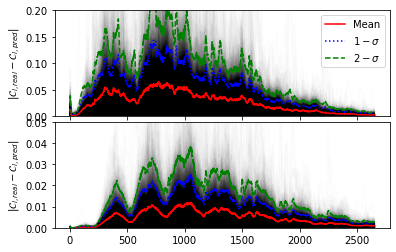

In [16]:
lmax = 2650
lmin = 2

l = np.arange(2, 2650)

te_error = np.abs(te_test - te_pred)
ee_error = np.abs(ee_test - ee_pred)

te_error_mean = np.mean(te_error, axis = 0)
te_error_sd   = np.std(te_error, axis = 0)
ee_error_mean = np.mean(ee_error, axis = 0)
ee_error_sd   = np.std(ee_error, axis = 0)


fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.})

for i in range(len(y_testset) - 1):
  ind = i

  axs[0].plot(l , np.abs(te_test[ind,:] - te_pred[ind,:]), color = 'black', alpha = 0.01)
  axs[0].set(ylabel = r'$|\mathcal{C}_{l,real} - \mathcal{C}_{l, pred}|$')

  axs[1].plot(l , np.abs(ee_test[ind,:] - ee_pred[ind,:]), color = 'black', alpha = 0.01)
  axs[1].set(ylabel = r'$|\mathcal{C}_{l,real} - \mathcal{C}_{l, pred}|$')

axs[0].plot(l, te_error_mean, color = 'red', label = 'Mean')
axs[1].plot(l, ee_error_mean, color = 'red')

axs[0].plot(l, te_error_mean + te_error_sd, color = 'blue', linestyle = ':', label = r'$1-\sigma$')
axs[1].plot(l, ee_error_mean + ee_error_sd, color = 'blue', linestyle = ':')

axs[0].plot(l, te_error_mean + 2*te_error_sd, color = 'green', linestyle = '--', label = r'$2-\sigma$')
axs[1].plot(l, ee_error_mean + 2*ee_error_sd, color = 'green', linestyle = '--')

axs[0].set(ylim=(0,0.2))
axs[1].set(ylim=(0,0.05))

axs[0].legend()

plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/comparison_full_TE-EE.jpeg')

In [17]:
# Mean TE multipole error

np.mean(te_error)

0.026760781822668927

In [18]:
# Mean EE multipole error

np.mean(ee_error)

0.004739918115678334

## Figure 6 (TT)

In [19]:
lmin = 2
lmax = 2650 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.014


pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
pars.set_for_lmax(3000)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,0]

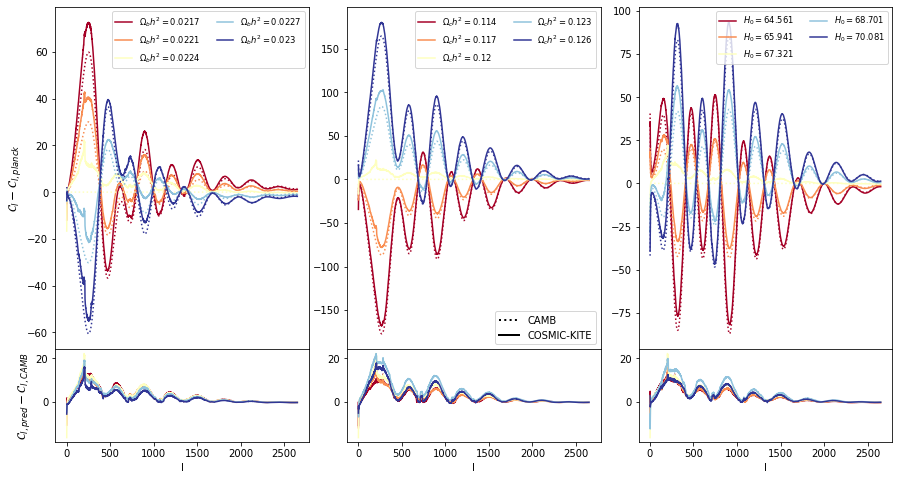

In [20]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12, rotation = 90)
axs[1,0].set_xlabel('l')
axs[1,1].set_xlabel('l')
axs[1,2].set_xlabel('l')
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17, labelpad = 10)
for i in range(n):
  # OMB
  omb = omb_true - 3*omb_sigma + 6*omb_sigma*i/(n-1)
  col = (omb - omb_true + 3*omb_sigma)/(6*omb_sigma)

  params  = np.array([omb, omc_true, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{b}h^{2} = $' + str(round(omb, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # OMC
  omc = omc_true - 3*omc_sigma + 6*omc_sigma*i/(n-1)
  col = (omc - omc_true + 3*omc_sigma)/(6*omc_sigma)

  params  = np.array([omb_true, omc, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{c}h^{2} = $' + str(round(omc, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # H0
  H0 = H0_true - 3*H0_sigma + 6*H0_sigma*i/(n-1)
  col = (H0 - H0_true + 3*H0_sigma)/(6*H0_sigma)

  params  = np.array([omb_true, omc_true, H0, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$H_{0} = $' + str(round(H0, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')
custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')

plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_TT_1.pdf')

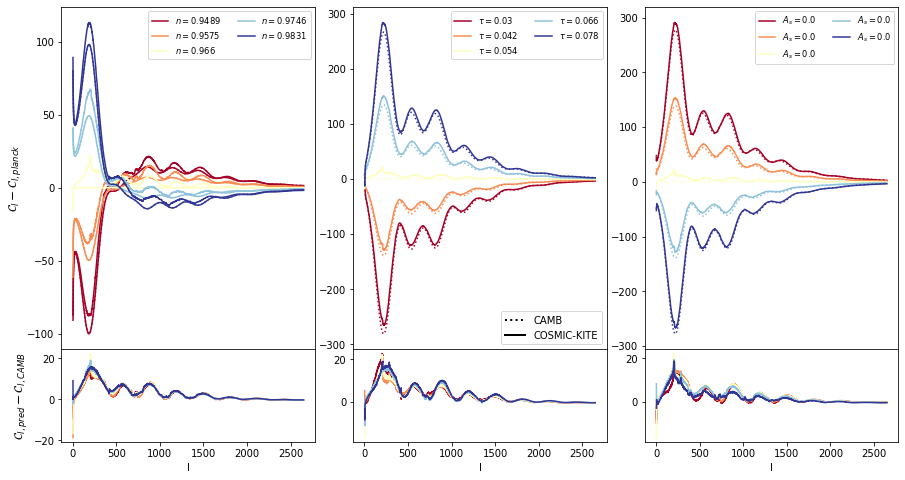

In [21]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12)
axs[1,0].set_xlabel('l')
axs[1,1].set_xlabel('l')
axs[1,2].set_xlabel('l')
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17)

for i in range(n):
  # n
  n0  = n_true - 3*n_sigma + 6*n_sigma*i/(n-1)
  col = (n0 - n_true + 3*n_sigma)/(6*n_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n0, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n0)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$n = $' + str(round(n0, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col))

  # tau
  tau = tau_true - 3*tau_sigma + 6*tau_sigma*i/(n-1)
  col = (tau - tau_true + 3*tau_sigma)/(6*tau_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\tau = $' + str(round(tau, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # As
  As  = As_true - 3*As_sigma + 6*As_sigma*i/(n-1)
  col = (As - As_true + 3*As_sigma)/(6*As_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau_true, As]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$A_{s} = $' + str(round(As, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_TT_2.pdf')

## Figure A.2 (TE)

In [25]:
lmin = 2
lmax = 2650 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.014


pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
pars.set_for_lmax(3000)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,3]

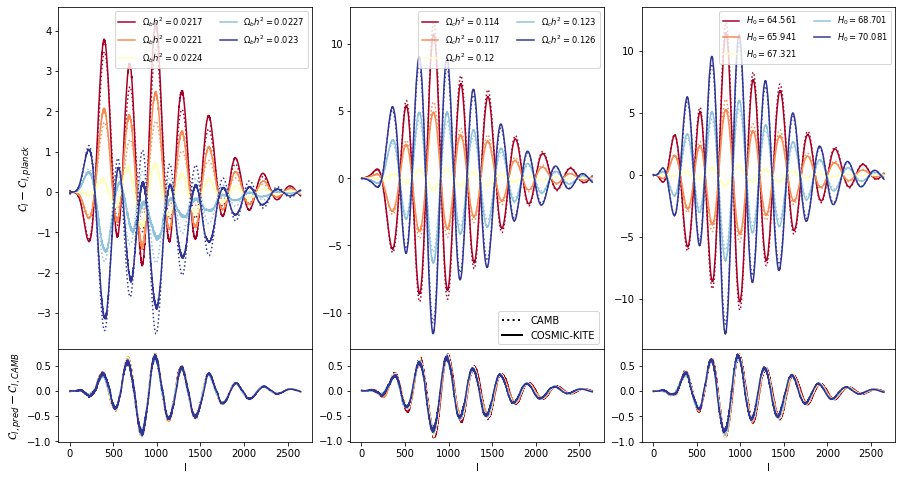

In [26]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12)
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17, labelpad = 25)
axs[1,0].set_xlabel('l')
axs[1,1].set_xlabel('l')
axs[1,2].set_xlabel('l')

for i in range(n):
  # OMB
  omb = omb_true - 3*omb_sigma + 6*omb_sigma*i/(n-1)
  col = (omb - omb_true + 3*omb_sigma)/(6*omb_sigma)

  params  = np.array([omb, omc_true, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{b}h^{2} = $' + str(round(omb, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # OMC
  omc = omc_true - 3*omc_sigma + 6*omc_sigma*i/(n-1)
  col = (omc - omc_true + 3*omc_sigma)/(6*omc_sigma)

  params  = np.array([omb_true, omc, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{c}h^{2} = $' + str(round(omc, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # H0
  H0 = H0_true - 3*H0_sigma + 6*H0_sigma*i/(n-1)
  col = (H0 - H0_true + 3*H0_sigma)/(6*H0_sigma)

  params  = np.array([omb_true, omc_true, H0, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$H_{0} = $' + str(round(H0, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_TE_1.pdf')

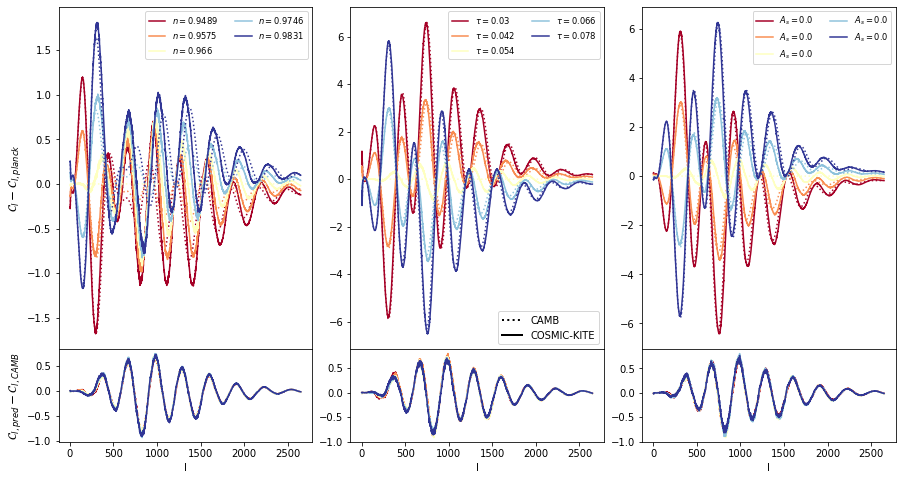

In [27]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12)
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17, labelpad = 25)
axs[1,0].set_xlabel('l')
axs[1,1].set_xlabel('l')
axs[1,2].set_xlabel('l')

for i in range(n):
  # n
  n0  = n_true - 3*n_sigma + 6*n_sigma*i/(n-1)
  col = (n0 - n_true + 3*n_sigma)/(6*n_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n0, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n0)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$n = $' + str(round(n0, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # tau
  tau = tau_true - 3*tau_sigma + 6*tau_sigma*i/(n-1)
  col = (tau - tau_true + 3*tau_sigma)/(6*tau_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\tau = $' + str(round(tau, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # As
  As  = As_true - 3*As_sigma + 6*As_sigma*i/(n-1)
  col = (As - As_true + 3*As_sigma)/(6*As_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau_true, As]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[2][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,3]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$A_{s} = $' + str(round(As, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_TE_2.pdf')

## Figure A.3 (EE)

In [22]:
lmin = 2
lmax = 2650 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.014


pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
pars.set_for_lmax(3000)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,1]

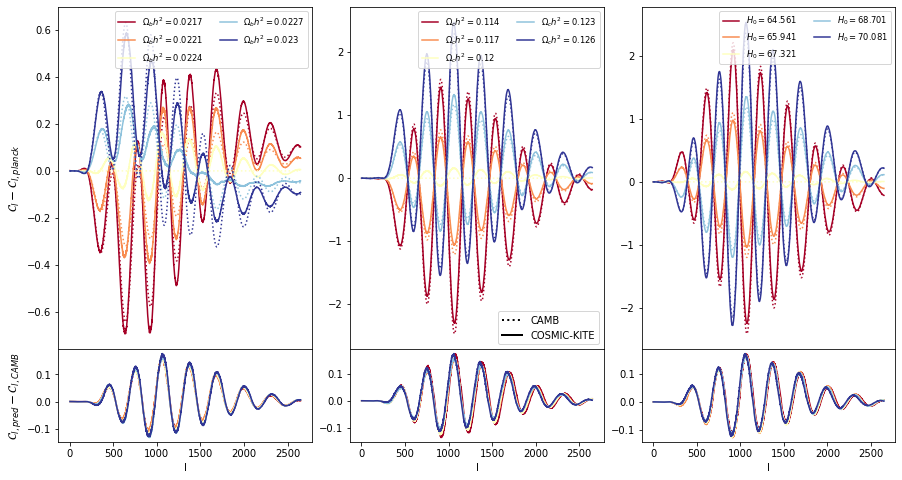

In [23]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12)
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17, labelpad = 20)
axs[1,0].set(xlabel = 'l')
axs[1,1].set(xlabel = 'l')
axs[1,2].set(xlabel = 'l')
#axs[2,2].set(xlabel = 'l')

for i in range(n):
  # OMB
  omb = omb_true - 3*omb_sigma + 6*omb_sigma*i/(n-1)
  col = (omb - omb_true + 3*omb_sigma)/(6*omb_sigma)

  params  = np.array([omb, omc_true, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  
  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{b}h^{2} = $' + str(round(omb, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # OMC
  omc = omc_true - 3*omc_sigma + 6*omc_sigma*i/(n-1)
  col = (omc - omc_true + 3*omc_sigma)/(6*omc_sigma)

  params  = np.array([omb_true, omc, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{c}h^{2} = $' + str(round(omc, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # H0
  H0 = H0_true - 3*H0_sigma + 6*H0_sigma*i/(n-1)
  col = (H0 - H0_true + 3*H0_sigma)/(6*H0_sigma)

  params  = np.array([omb_true, omc_true, H0, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$H_{0} = $' + str(round(H0, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_EE_1.pdf')

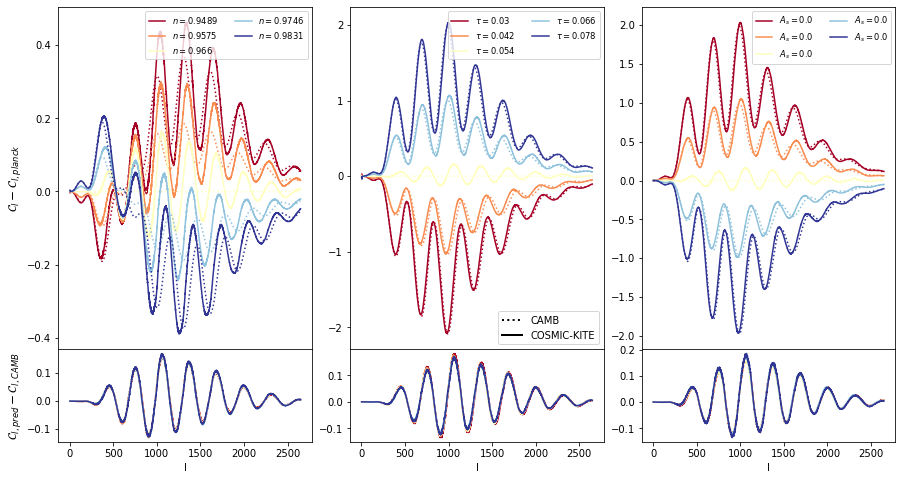

In [24]:
l = np.arange(lmin, lmax)
n = 5
cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 3, sharex = 'col', gridspec_kw = {'wspace':0.15, 'hspace':0.0,
                                                            'width_ratios': [1,1,1],'height_ratios': [1, 0.27]}, 
                        figsize=(15, 8))
plt.set_cmap(cm)

axs[0,0].set_ylabel(r'$\mathcal{C}_{l} - \mathcal{C}_{l, planck}$', fontsize=12)
axs[1,0].set_ylabel(r'$\mathcal{C}_{l,pred} - \mathcal{C}_{l, CAMB}$', fontsize=12)
#axs[2,0].set_ylabel(r'$\frac{(\mathcal{C}_{l, pred} - \mathcal{C}_{l, CAMB})}{\mathcal{C}_{l, CAMB}}$', rotation = 45, fontsize=17, labelpad = 20)
axs[1,0].set(xlabel = 'l')
axs[1,1].set(xlabel = 'l')
axs[1,2].set(xlabel = 'l')
#axs[2,2].set(xlabel = 'l')

for i in range(n):
  # n
  n0  = n_true - 3*n_sigma + 6*n_sigma*i/(n-1)
  col = (n0 - n_true + 3*n_sigma)/(6*n_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n0, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n0)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$n = $' + str(round(n0, 4)))
  axs[0,0].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,0].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,0].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # tau
  tau = tau_true - 3*tau_sigma + 6*tau_sigma*i/(n-1)
  col = (tau - tau_true + 3*tau_sigma)/(6*tau_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  axs[0,1].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\tau = $' + str(round(tau, 3)))
  axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,1].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,1].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

  # As
  As  = As_true - 3*As_sigma + 6*As_sigma*i/(n-1)
  col = (As - As_true + 3*As_sigma)/(6*As_sigma)

  params  = np.array([omb_true, omc_true, H0_true, n_true, tau_true, As]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[1][0]

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As, ns = n_true)
  pars.set_for_lmax(3000)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,1]

  axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$A_{s} = $' + str(round(As, 3)))
  axs[0,2].plot(l,(fiducial - true_cl), c = cm(col), linestyle = ':')
  axs[1,2].plot(l,(true_cl - ck_pred), c = cm(col))
  #axs[2,2].plot(l,(true_cl - ck_pred)/true_cl, c = cm(col))

axs[0,0].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')

custom_lines = [Line2D([0], [0], color='black', lw=2, linestyle = ':'),
            Line2D([0], [0], color='black', lw=2)]
first_legend = axs[0,1].legend(custom_lines, ['CAMB', 'COSMIC-KITE'], loc='lower right')
axs[0,1].add_artist(first_legend)
axs[0,1].legend(ncol = 2, loc = 1, fontsize='small')
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/full_variation_EE_2.pdf')

## Figure 7

In [28]:
lmin = 2
lmax = 2650 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.014


pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
pars.set_for_lmax(3000)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,0]

In [29]:
# Define log lik
def log_lik(true, pred):

  l    = np.arange(lmin, lmax)
  aux0 = np.log(true/pred)
  aux1 = (pred/true)
  aux  = (2*l + 1)*(aux0 + aux1 - 1)
  val  = -1.*np.sum(aux)
  return val

In [30]:
like    = []
like_ck = []

nobs = 1000
params = np.random.normal(loc = [omb_true, omc_true, H0_true, n_true, tau_true, As_true], scale = [omb_sigma, omc_sigma, H0_sigma, n_sigma, tau_sigma, As_sigma], 
                          size = (nobs, 6))

for j in range(nobs):
  if (j%50 == 0): print(j)
  H0    = params[j, 2]
  ombh2 = params[j, 0]
  omch2 = params[j, 1]
  n     = params[j, 3] 
  tau   = params[j, 4] 
  As    = params[j, 5] 

  # CAMB
  pars = camb.CAMBparams()
  pars.set_cosmology(H0 = H0, ombh2 = ombh2, omch2 = omch2, tau = tau)
  pars.InitPower.set_params(As = As, ns = n)
  pars.set_for_lmax(3000)
  results  = camb.get_results(pars)
  powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  camb_ps  = powers['total'][lmin:lmax,0]

  # Cosmic-kite
  params0 = np.array([ombh2, omch2, H0, n, tau, As]).reshape(1,-1)
  ck_ps   = cosmic_kite.pars2ps(params0)[0][0]

  like.append(log_lik(fiducial, camb_ps))
  like_ck.append(log_lik(fiducial, ck_ps))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


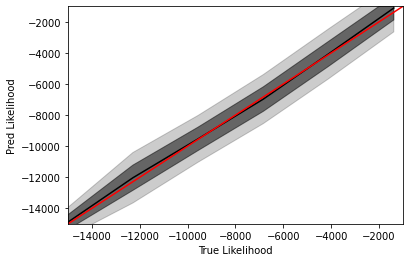

In [31]:
from scipy.stats import binned_statistic

lik_mean, edges, x = binned_statistic(like, like_ck, statistic='mean', bins = np.linspace(np.min(like), np.max(like),10))
lik_sd, edges, x   = binned_statistic(like, like_ck, statistic='std', bins = np.linspace(np.min(like), np.max(like),10))

x = np.zeros(9)
for i in range(9):
  x[i] = edges[i]+ (edges[1] - edges[0])/2

plt.plot(x, lik_mean, c = 'black')
plt.fill_between(x, lik_mean - lik_sd, lik_mean + lik_sd, color = (0,0,0,0.5))
plt.fill_between(x, lik_mean - 2*lik_sd, lik_mean + 2*lik_sd, color = (0,0,0,0.2))
x = np.linspace(np.min(like), np.max(like), 100)
plt.plot(x, x, color = 'red')
plt.xlabel('True Likelihood')
plt.ylabel('Pred Likelihood')
plt.xlim((-1.5e4,-1e3))
plt.ylim((-1.5e4,-1e3))
plt.savefig('/content/drive/My Drive/Colab Notebooks/cosmo_par/cosmic-kite/likComparison.pdf', bbox_inches = "tight")

## Figure 8 (half of it)

### First we need to install emcee and pygtc

In [32]:
!pip install emcee

     |████████████████████████████████| 51kB 2.7MB/s 


In [33]:
!pip install pygtc

     |████████████████████████████████| 6.2MB 5.7MB/s 


In [34]:
import emcee
import pygtc

### Let's run some chains

In [35]:
lmin = 2
lmax = 2650

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.01

pars = camb.read_ini('/content/drive/My Drive/Colab Notebooks/cosmo_par/data/raw/planck_2018.ini')
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
pars.set_for_lmax(3000)
results = camb.get_results(pars)
powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,0]

In [36]:
def forward_model(x, true_cl):
  flag = 0
  if ((np.max(x[1]) > 0.023482) or (np.min(x[1]) < 0.021282)): flag = 1
  if ((np.max(x[2]) > 0.130607) or (np.min(x[2]) < 0.109607)): flag = 1
  if ((np.max(x[0]) > 76.52) or (np.min(x[0]) < 58.121)): flag = 1
  if ((np.max(x[3]) > 0.99454) or (np.min(x[3]) < 0.937550)): flag = 1
  if ((np.max(x[4]) > 0.094) or (np.min(x[4]) < 0.01430)): flag = 1
  if ((np.max(x[5]) > 2.2705e-9) or (np.min(x[5]) < 1.9305e-9)): flag = 1
  if flag == 0:
    try:
      params  = np.array([x[1], x[2], x[0], x[3], x[4], x[5]]).reshape(1,-1)
      tt_pred, ee_pred, te_pred, ell = cosmic_kite.pars2ps(params)
      val     = log_lik(true_cl, tt_pred[0])
    except:
      val = -np.inf
  else:
    val = -np.inf

  return val

In [37]:
# Define log lik
def log_lik(true, pred):

  l    = np.arange(lmin, lmax)
  aux0 = np.log(true/pred)
  aux1 = (pred/true)
  aux  = (2*l + 1)*(aux0 + aux1 - 1)
  val  = -1.*np.sum(aux)
  return val

In [38]:
nwalkers = 16
ndim     = 6
p0       = np.random.normal(loc = [H0_true, omb_true, omc_true, n_true, tau_true, As_true],
                            scale = [H0_sigma, omb_sigma, omc_sigma, n_sigma, tau_sigma, As_sigma], 
                            size = (nwalkers, ndim))

In [39]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, forward_model, args=[fiducial])
state   = sampler.run_mcmc(p0, 100, progress = True)
sampler.reset()

100%|██████████| 100/100 [03:12<00:00,  1.92s/it]


In [40]:
chain = sampler.run_mcmc(state, nsteps = 5000, progress = True, store = True)

100%|██████████| 5000/5000 [2:38:01<00:00,  1.90s/it]


In [41]:
ck_samples = sampler.get_chain(thin=15, flat=True)
ck_samples.shape

(5328, 6)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


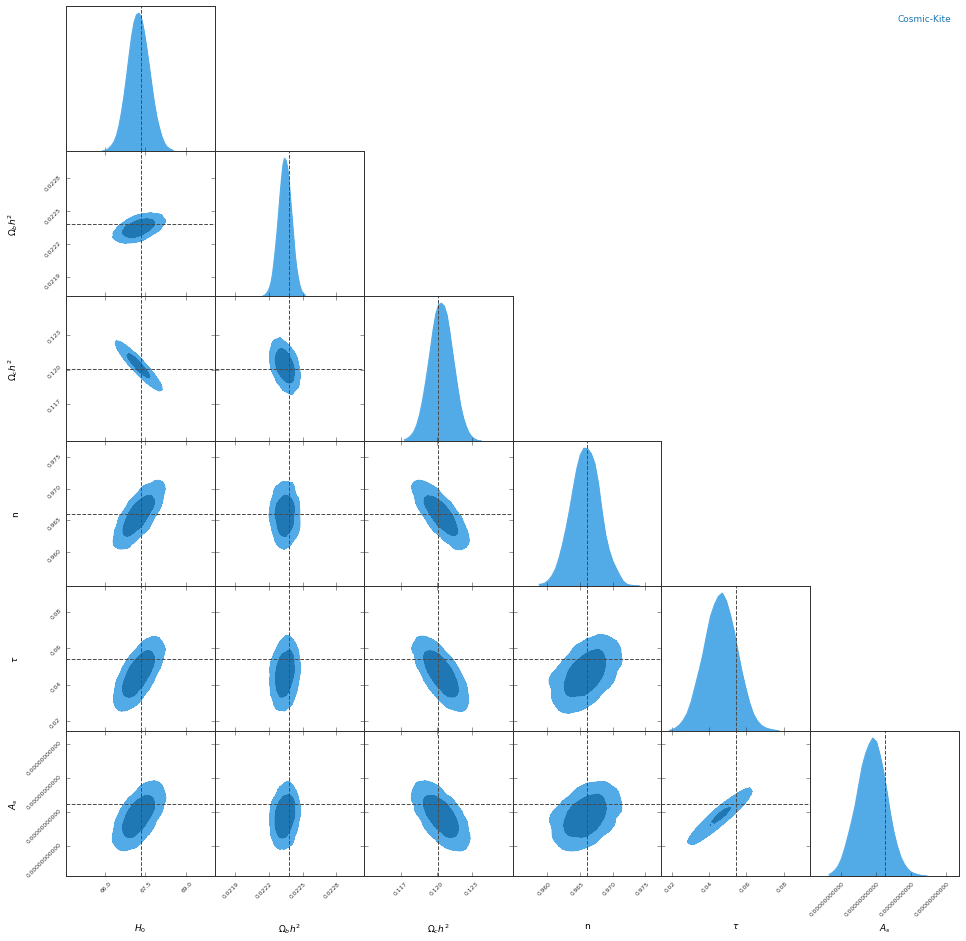

In [42]:
par_range = ((H0_true - 3*H0_sigma, H0_true + 3*H0_sigma), (omb_true - 3*omb_sigma, omb_true + 3*omb_sigma), 
             (omc_true - 3*omc_sigma, omc_true + 3*omc_sigma), (n_true - 2*n_sigma, n_true + 2*n_sigma), 
             (tau_true - 5*tau_sigma, tau_true + 5*tau_sigma), (As_true - 5*As_sigma, As_true + 5*As_sigma))
labels = [r'$H_{0}$', r'$\Omega_{b}h^{2}$', r'$\Omega_{c}h^{2}$', 'n', r'$\tau$', r'$A_{s}$']
GTC = pygtc.plotGTC(chains=[ck_samples],
                    truths = [(H0_true, omb_true, omc_true, n_true, tau_true, As_true)],
                    paramNames = labels,
                    chainLabels = ["Cosmic-Kite"],
                    paramRanges = par_range,
                    figureSize = 16)

## Profiling

In [43]:
from time import time

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9

# Let's choose 100 random cosmologies around planck values
nran   = 1000
params = np.random.normal(loc = [omb_true, omc_true, H0_true, n_true, tau_true, As_true], scale = [omb_sigma, omc_sigma, H0_sigma, n_sigma, tau_sigma, As_sigma],size = (nran, 6))

In [ ]:
# Let's measure the time to compute 100 spectra with CAMB
pars = camb.CAMBparams()

camb_start = time()

for i in range(nran):
  if (i%50 == 0): print(i)
  pars.set_cosmology(H0 = params[i,2], ombh2 = params[i,0], omch2 = params[i,1], tau = params[i,4])
  pars.InitPower.set_params(As = params[i,5], ns = params[i,3])
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')

camb_end = time()
print(f'CAMB took {camb_end - camb_start} seconds to compute the power spectra for ', nran, ' random cosmologies!')

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700


In [ ]:
# Let's measure the time to compute 1000 spectra with Cosmic-kite in a loop

ck_start = time()
for i in range(nran):
  if (i%50 == 0): print(i)
  ps = cosmic_kite.pars2ps(params[i,:].reshape(1, -1))

ck_end = time()
print(f'Cosmic-kite took {ck_end - ck_start} seconds to compute the power spectra for ',nran,' random cosmologies in loop mode!')
print('This is ' + str( (camb_end - camb_start) / (ck_end - ck_start) ) + ' faster than CAMB')

In [ ]:
# Let's measure the time to compute 1000 spectra with Cosmic-kite

ck_start = time()

ps = cosmic_kite.pars2ps(params)

ck_end = time()
print(f'Cosmic-kite took {ck_end - ck_start} seconds to compute the power spectra for ',nran,' random cosmologies!')
print('This is ' + str( (camb_end - camb_start) / (ck_end - ck_start) ) + ' faster than CAMB')